In [1]:
# mounting google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Since there have been error of font "Times New Roman", we can run it locally.

In [7]:
# Install Times New Roman
!apt-get -y install ttf-mscorefonts-installer fontconfig
# fc-cache -f -v

# Restart runtime after installing.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fontconfig is already the newest version (2.13.1-4.2ubuntu5).
ttf-mscorefonts-installer is already the newest version (3.8ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
# Copy dataset from google drive and unzip.
!mkdir /content/data
!mkdir /content/data/train
!mkdir /content/data/val
!cp /content/drive/MyDrive/IEEE_Access/dataset/train.zip /content/data/train.zip
!cp /content/drive/MyDrive/IEEE_Access/dataset/val.zip   /content/data/val.zip
!unzip /content/data/train.zip -d /content/data/train
!unzip /content/data/val.zip   -d /content/data/val

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/data/train/3_122400.jpg  
  inflating: /content/data/train/3_122400.txt  
  inflating: /content/data/train/3_122430.jpg  
  inflating: /content/data/train/3_122430.txt  
  inflating: /content/data/train/3_122460.jpg  
  inflating: /content/data/train/3_122460.txt  
  inflating: /content/data/train/3_122490.jpg  
  inflating: /content/data/train/3_122490.txt  
  inflating: /content/data/train/3_122520.jpg  
 extracting: /content/data/train/3_122520.txt  
  inflating: /content/data/train/3_122550.jpg  
  inflating: /content/data/train/3_122550.txt  
  inflating: /content/data/train/3_122730.jpg  
  inflating: /content/data/train/3_122730.txt  
  inflating: /content/data/train/3_122760.jpg  
  inflating: /content/data/train/3_122760.txt  
  inflating: /content/data/train/3_122790.jpg  
  inflating: /content/data/train/3_122790.txt  
  inflating: /content/data/train/3_122820.jpg  
  inflating: /content/data/train/3_122820.txt  
  in

In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Seaborn style and font settings
sns.set(style='whitegrid')
plt.rcParams.update({
    'font.family': 'Times New Roman',
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
})

# Directory containing YOLO labels
label_dir = '/content/data/train'

# Collect normalized width and height
widths = []
heights = []

for filename in os.listdir(label_dir):
    if filename.endswith(".txt"):
        filepath = os.path.join(label_dir, filename)
        with open(filepath, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 5:  # YOLO format: class x_center y_center width height
                    widths.append(float(parts[3]))
                    heights.append(float(parts[4]))

X = np.column_stack((widths, heights))

# Plot all bounding boxes (scatter plot)
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=widths, y=heights, s=30, color='dodgerblue', alpha=0.6, ax=ax)
ax.set_title('All Bounding Boxes (Normalized Width vs Height)')
ax.set_xlabel('Normalized Width')
ax.set_ylabel('Normalized Height')
fig.patch.set_alpha(0.0)
plt.savefig('all_bboxes.png', transparent=True, dpi=300)
plt.show()

# Apply KMeans clustering for k from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    centers = kmeans.cluster_centers_

    # Print centroid information
    print(f"\nCluster Centers for k={k}:")
    for idx, (w, h) in enumerate(centers):
        print(f"  Cluster {idx}: Width={w:.4f}, Height={h:.4f}")

    # Create cluster plot
    fig, ax = plt.subplots(figsize=(8, 6))
    palette = sns.color_palette("tab10", k)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette=palette, s=30, ax=ax, legend=False)
    sns.scatterplot(x=centers[:, 0], y=centers[:, 1], marker='X', color='black', s=120, ax=ax)

    ax.set_title(f'K-Means Clustering (k={k})')
    ax.set_xlabel('Normalized Width')
    ax.set_ylabel('Normalized Height')
    fig.patch.set_alpha(0.0)
    plt.savefig(f'kmeans_k{k}.png', transparent=True, dpi=300)
    plt.show()

    plt.savefig(f"transparent_plot_{k}.png", transparent=True, dpi=300)

from google.colab import files
files.download("transparent_plot.png")



Output hidden; open in https://colab.research.google.com to view.

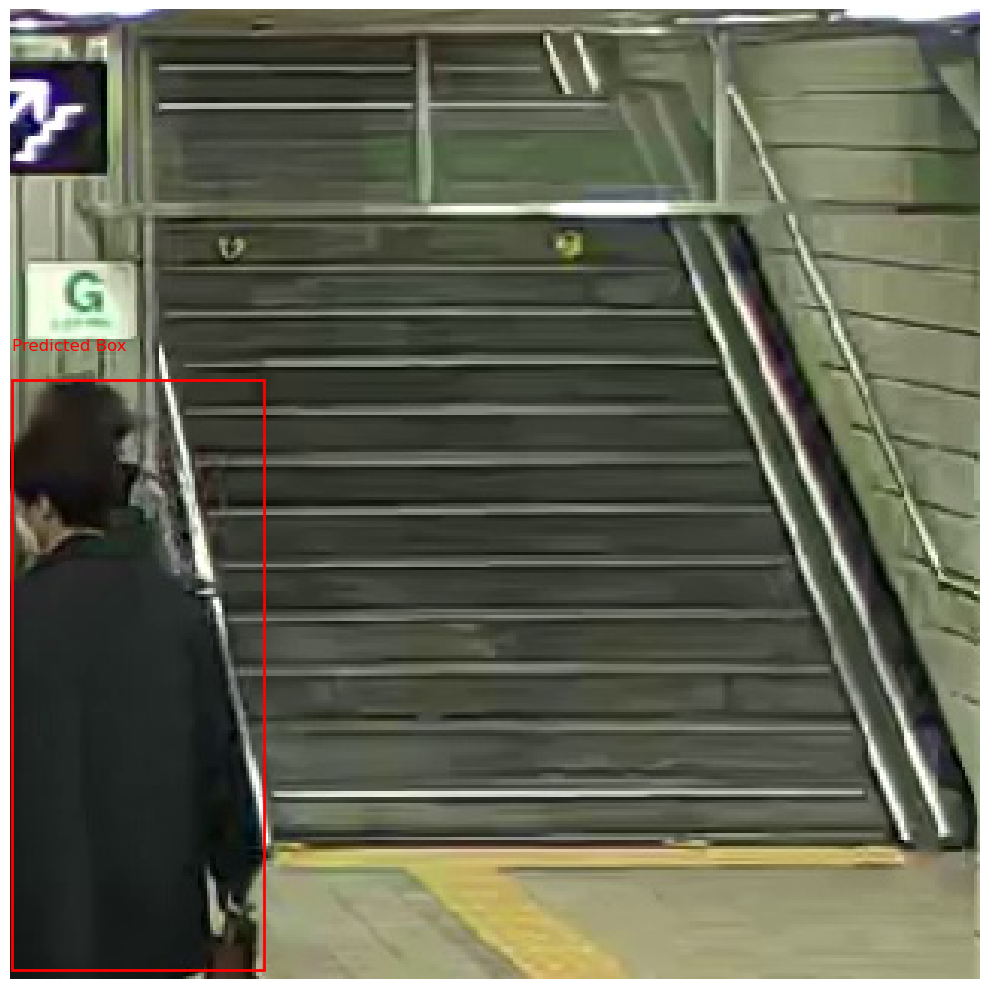

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# Image path
image_path = '/home/hj/Desktop/Dad/github/DUP/data/test/4_058020.jpg'

# Bounding box in COCO format: [x, y, width, height]
bbox = [0.023426055908203125, 122.0132064819336, 83.36765670776367, 194.3981704711914]

# Load and convert image from BGR (OpenCV) to RGB (Matplotlib)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create plot
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)

# Draw bounding box in red
x, y, w, h = bbox
rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

# Optional: label the box
ax.text(x, y - 10, 'Predicted Box', color='red', fontsize=12)

# Show plot
plt.axis('off')
plt.tight_layout()
plt.show()
